In [144]:
import pytest
import sys
import os 
import pandas as pd
import importlib
# dir_path = os.path.abspath(os.path.join(os.path.dirname( __file__ ), '..'))
# sys.path.append(dir_path)
# config
%matplotlib inline
sys.path.append('/workspace')

In [156]:
from modules.Transformers import DateNormalizer as dmod
from modules.Visualizations import LineChart as lcmod
from modules import Pipeline as pmod
importlib.reload(dmod)
importlib.reload(lcmod)
importlib.reload(pmod)

<module 'modules.Pipeline' from '/workspace/modules/Pipeline.py'>

In [157]:
from modules.Pipeline import Pipeline as p
from modules.CM_API import CM_API as cm
from modules.Transformers.DateNormalizer import DateNormalizer as dn
from modules.Visualizations.LineChart import LineChart as lc

In [158]:
test_obj = cm()
test_network_data = test_obj.get_coinmetrics_network_data(api_key='KKzV6V2DTY87v3m1dGZu', asset='eth', metrics='AdrActCnt,TxCnt', start='2019-01-01', end='2019-01-07')

In [159]:
test_network_data.head()

,time,AdrActCnt,TxCnt
0,2019-01-01T00:00:00.000Z,227755.0,448168.0
1,2019-01-02T00:00:00.000Z,266633.0,589959.0
2,2019-01-03T00:00:00.000Z,298379.0,596620.0
3,2019-01-04T00:00:00.000Z,264923.0,549398.0
4,2019-01-05T00:00:00.000Z,257064.0,511189.0


goodbye
TRANSFORMERS []
TRANSFORMERS [<modules.Transformers.DateNormalizer.DateNormalizer object at 0x7f05a0835ba8>]
uhhh


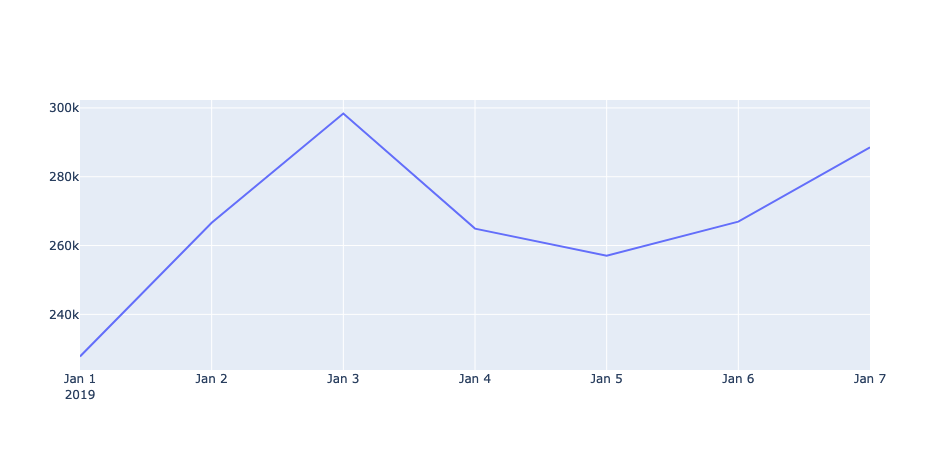

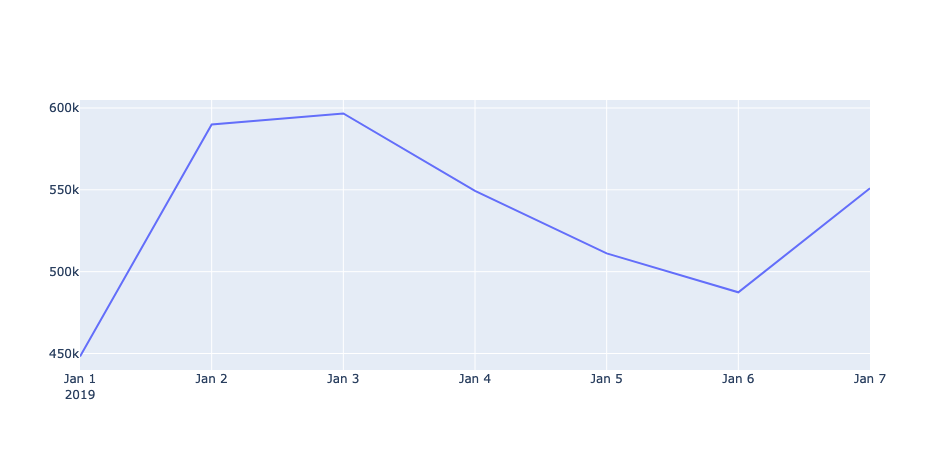

In [160]:
test_pipeline = p()
test_obj = cm()
test_network_data = test_obj.get_coinmetrics_network_data(api_key='KKzV6V2DTY87v3m1dGZu', asset='eth', metrics='AdrActCnt,TxCnt', start='2019-01-01', end='2019-01-07')
d = dn()
test_chart = lc(chart_title='test', y_axis_columns=['AdrActCnt'])
test_chart_2 = lc(chart_title='test 2', y_axis_columns=['TxCnt'])
d.say_hello()
test_pipeline.load_data(df=test_network_data)
test_pipeline.load_transformers(transformers=[dn()])
test_pipeline.print_transformers()
test_pipeline.execute_transformers()
test_pipeline.load_charts(charts=[test_chart, test_chart_2])
test_pipeline.render_charts()
# test_pipeline.get_data()

In [155]:
%qtconsole 